<a href="https://colab.research.google.com/github/SalehMehrabani/Artifical-Intelligance/blob/main/NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor

In [ ]:
import torch

In [ ]:
z=torch.zeros(5,3)
z

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
y=torch.ones((3,5), dtype=torch.int16)
y

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.int16)

In [ ]:
torch.manual_seed(1729)

r1=torch.rand(2,2)
print(r1)

r2=torch.rand(2,2)
print(r2)

torch.manual_seed(1729)

r3=torch.rand(2,2)
print(r3)

tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [ ]:
torch.manual_seed(1080)
r1=torch.randint(100, (2,2))
print(r1)

tensor([[13, 34],
        [42, 92]])


In [ ]:
z1=torch.ones(2,3)
print(z1)

z2=torch.ones(2,3)*2
print(z2)

z3=z1+z2 
print(z3)
print(z3.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [ ]:
x1=torch.ones(2,2)-0.5*2
print(x1)

x2=torch.zeros(2,2)-20
print(x2)
print(torch.abs(x2))
print(torch.asin(x1))

torch.manual_seed(100)
x3=torch.rand(2,2)
print(x3)
print(torch.asin(x3))

print(torch.det(x1))
print(torch.svd(x1))
print(torch.std_mean(x1))
print(torch.max(x1))

tensor([[0., 0.],
        [0., 0.]])
tensor([[-20., -20.],
        [-20., -20.]])
tensor([[20., 20.],
        [20., 20.]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[0.1117, 0.8158],
        [0.2626, 0.4839]])
tensor([[0.1119, 0.9542],
        [0.2657, 0.5051]])
tensor(0.)


In [ ]:
v1=torch.rand(2,2)
print(v1, v1.device)

tensor([[0.7812, 0.7394],
        [0.2722, 0.4132]]) cpu


In [ ]:
if torch.cuda.is_available():
  v1=v1.to("cuda")
  print("Available")
  print(v1.device)
else:
  print("NOT Availabe")

Available
cuda:0


# Dataset and Dataloader

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# training_data[1]

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

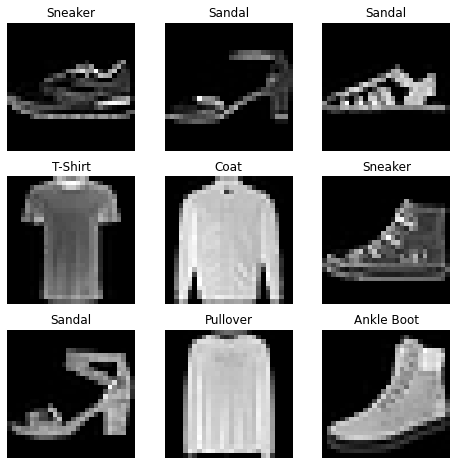

In [ ]:
figure = plt.figure(figsize=(8, 8))
# What is figsize?
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Simple Neural Network


In [ ]:
import torch
import torch.nn as nn

In [ ]:
n_input, n_hidden, n_out, batch_size, learning_rate = 10, 15, 1, 100, 0.01